In [48]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D

matplotlib.style.use('ggplot')

In [49]:
df = pd.read_excel('BreastCancer.xlsx')

df = df.iloc[:,1:]
#df.iloc[:,12:32].head()
df = df.drop(df.iloc[:,12:32], axis=1)

print('Number of NaN values:' +str(df.isnull().sum().sum()))
df.head()

Number of NaN values:0


,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,Tumor_Size,Lymph_Node_Status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,5.0,5
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,3.0,2
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,2.5,0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,2.0,0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,3.5,0


In [50]:
df['Time'] = pd.to_numeric(df['Time'],errors='coerce')

N    151
R     47
Name: Outcome, dtype: int64


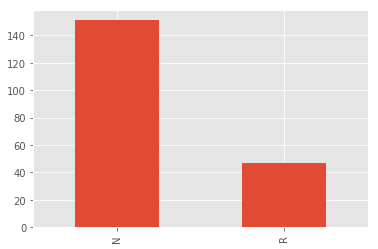

In [51]:
df['Outcome'].value_counts().plot(kind='bar')
print(df['Outcome'].value_counts())
plt.show()

In [52]:
df.corr()

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,Tumor_Size
Time,1.000000,-0.344722,-0.264671,-0.346080,-0.344031,0.164793,0.010000,-0.139475,-0.171841,0.177311,0.269992,-0.133355
radius_mean,-0.344722,1.000000,0.143456,0.995933,0.992855,-0.158239,0.159017,0.469518,0.664010,-0.051610,-0.416674,0.172102
texture_mean,-0.264671,0.143456,1.000000,0.142033,0.140440,-0.192262,-0.039803,0.037165,0.006687,-0.165166,-0.145572,0.027073
perimeter_mean,-0.346080,0.995933,0.142033,1.000000,0.990699,-0.102912,0.236721,0.533194,0.712766,-0.006512,-0.353560,0.166489
area_mean,-0.344031,0.992855,0.140440,0.990699,1.000000,-0.141470,0.163176,0.475862,0.667530,-0.060785,-0.397733,0.174491
smoothness_mean,0.164793,-0.158239,-0.192262,-0.102912,-0.141470,1.000000,0.666559,0.623867,0.545734,0.540761,0.744890,-0.084376
compactness_mean,0.010000,0.159017,-0.039803,0.236721,0.163176,0.666559,1.000000,0.836015,0.716438,0.666822,0.735474,-0.060199
concavity_mean,-0.139475,0.469518,0.037165,0.533194,0.475862,0.623867,0.836015,1.000000,0.909990,0.524861,0.449928,-0.010244
concave_points_mean,-0.171841,0.664010,0.006687,0.712766,0.667530,0.545734,0.716438,0.909990,1.000000,0.429968,0.268210,0.050040
symmetry_mean,0.177311,-0.051610,-0.165166,-0.006512,-0.060785,0.540761,0.666822,0.524861,0.429968,1.000000,0.604104,-0.151551


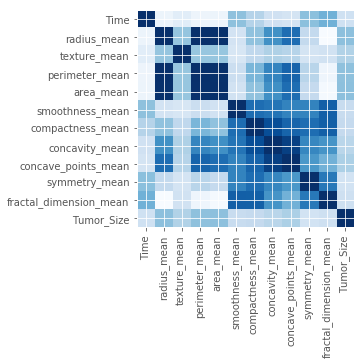

In [53]:
plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(df.iloc[1:13]))]
plt.xticks(tick_marks, df.iloc[:,1:13], rotation='vertical')
plt.yticks(tick_marks, df.iloc[:,1:13])
plt.show()

In [54]:
X = df.iloc[:,1:12]
y = df['Outcome'].copy()
y = y.map({'R':0, 'N':1})

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)


In [56]:
X_train.var()

Time                        1171.216359
radius_mean                    9.695310
texture_mean                  17.790162
perimeter_mean               441.966059
area_mean                 118874.656553
smoothness_mean                0.000149
compactness_mean               0.002541
concavity_mean                 0.004697
concave_points_mean            0.001150
symmetry_mean                  0.000705
fractal_dimension_mean         0.000053
dtype: float64

In [60]:
normalized_X = preprocessing.normalize(X_train)

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn import svm

bg = BaggingClassifier(svm.SVC(kernel='linear',gamma='auto',C=1000),max_samples=0.2, max_features=1.0)
bg.fit(normalized_X, y_train)
print('Accuracy:',bg.score(X_test,y_test))

Accuracy: 0.85
